<a href="https://colab.research.google.com/github/paragajg/Data-Science-9/blob/master/1.Python/Bitcoin_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem**
- Analyse Bitcoin price using Candlestick chart

## Steps to solve the problem -
1. Install necessary packages / libraries
2. Download BTC - USD data.
3. Clean & Transform data downloaded.
4. Explore the data through visualizations.
6. Create Candlestick chart to visualize the data
7. Use library to create interactive candlestick chart.

**Install necessary packages / libraries**

In [ ]:
! pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

**Download data**

In [4]:
df = yf.download(tickers = "BTC-USD", start="2017-01-01", end="2022-08-06")

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [6]:
df.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06'],
              dtype='datetime64[ns]', name='Date', length=2044, freq=None)

**Transform and clean data**

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.rename(columns={"Open": "o", "High": "h", "Low":"l","Close":"c"}, inplace = True)
df.columns

Index(['o', 'h', 'l', 'c', 'Adj Close', 'Volume'], dtype='object')

**Exploration of data**

In [10]:
df.describe()

,o,h,l,c,Adj Close,Volume
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,17500.569720,17957.180749,16989.541504,17509.053446,17509.053446,2.194326e+10
std,17324.668553,17769.464868,16804.803657,17316.894826,17316.894826,2.044896e+10
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,6280.202637,6397.040039,6155.244263,6284.792725,6284.792725,5.037467e+09
50%,9273.208984,9431.064453,9118.055176,9277.233887,9277.233887,1.864234e+10
75%,29666.385742,30470.710449,28908.559082,29667.787109,29667.787109,3.274962e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [11]:
df["SMA20"] = df["c"].rolling(20).mean()
df["SMA50"] = df["c"].rolling(50).mean()

In [12]:
df.head()

,o,h,l,c,Adj Close,Volume,SMA20,SMA50
Date,,,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008,NaN,NaN
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992,NaN,NaN
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000,NaN,NaN
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984,NaN,NaN
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008,NaN,NaN


In [13]:
df.dropna(inplace = True)
df.head(n=10)

,o,h,l,c,Adj Close,Volume,SMA20,SMA50
Date,,,,,,,,
2017-02-19,1054.760010,1056.810059,1043.459961,1047.869995,1047.869995,77423296,1019.962299,955.824878
2017-02-20,1048.689941,1080.489990,1041.689941,1079.979980,1079.979980,109478000,1025.441147,957.457977
2017-02-21,1079.280029,1117.250000,1076.930054,1115.300049,1115.300049,186868992,1031.754999,959.328978
2017-02-22,1114.800049,1125.390015,1100.550049,1117.439941,1117.439941,136100000,1037.036996,960.800978
2017-02-23,1117.270020,1176.619995,1116.959961,1166.719971,1166.719971,189454000,1043.877493,961.040778
2017-02-24,1172.709961,1200.390015,1131.959961,1173.680054,1173.680054,330759008,1050.416495,964.246779
2017-02-25,1170.410034,1174.849976,1124.589966,1143.839966,1143.839966,139960992,1056.241495,969.079558
2017-02-26,1144.270020,1167.469971,1130.199951,1165.199951,1165.199951,116486000,1062.593991,974.211857
2017-02-27,1163.780029,1181.979980,1163.380005,1179.969971,1179.969971,131570000,1068.524991,979.587277


**Plot Line Graph**

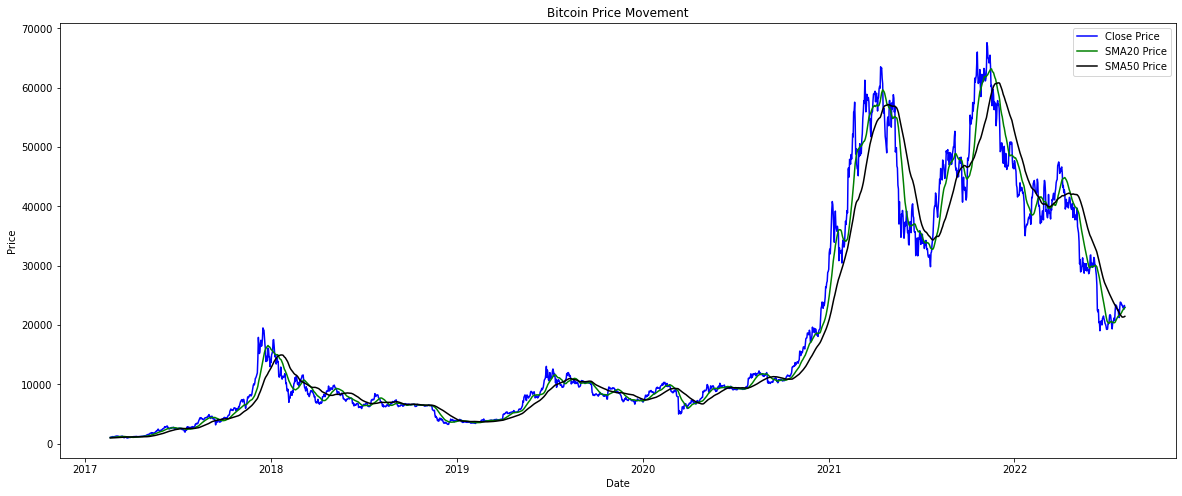

In [20]:
plt.figure(figsize= (20,8))
plt.plot(df.index, df.c, color = "blue", label = "Close Price")
plt.plot(df.index, df["SMA20"], color = "green", label = "SMA20 Price")
plt.plot(df.index, df["SMA50"], color = "black", label = "SMA50 Price")

plt.title("Bitcoin Price Movement")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")

plt.show()

**Create Candlestick Chart**

In [ ]:
!pip install mpl_finance

In [24]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

In [26]:
df['date'] = df.index

In [27]:
df['date'] = df['date'].apply(mpl_dates.date2num)

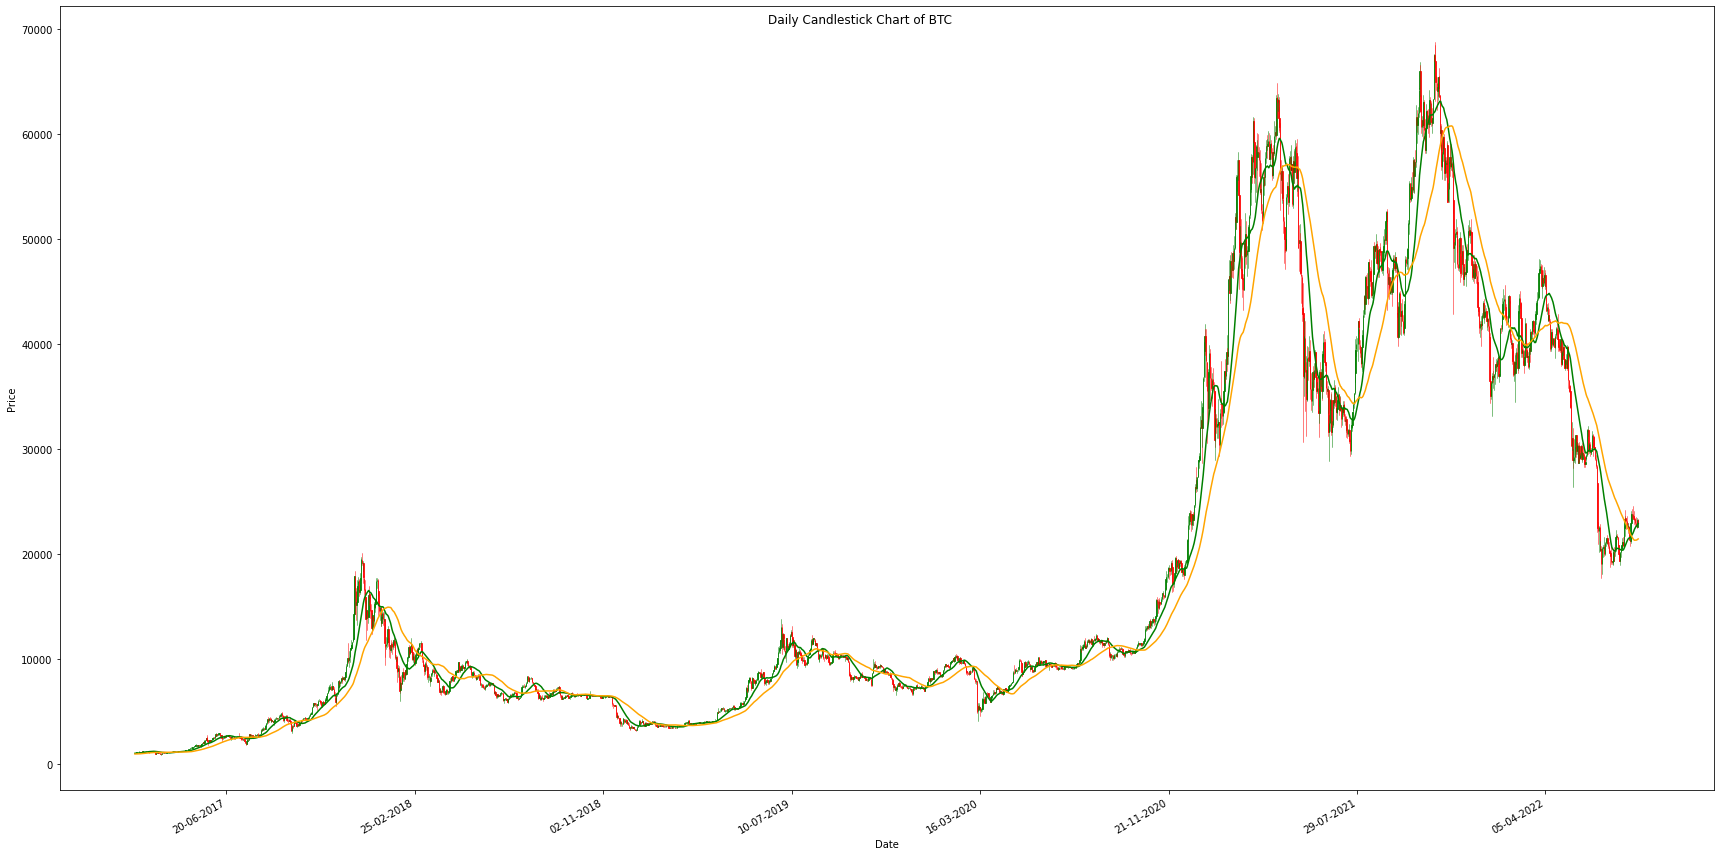

In [32]:
fig, ax = plt.subplots()
fig.set_figwidth(24)
fig.set_figheight(12)

candlestick_ohlc(ax, df[["date","o","h","l","c"]].values, width=0.6,
                 colorup='green', colordown='red', alpha=0.8)
plt.plot(df.date, df["SMA20"], color = "green", label = "SMA20 Price")
plt.plot(df.date, df["SMA50"], color = "orange", label = "SMA50 Price")
  
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of BTC')
  
# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
  
fig.tight_layout()
  
plt.show()

**Interactive Candlestick chart**

In [33]:
import plotly.graph_objects as go

In [40]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['o'], high=df['h'],
                low=df['l'], close=df['c'])
                      ])

fig.add_trace(go.Scatter(x = df.index, y = df["SMA20"], mode = "lines", name = "SMA20", line = dict(color = "teal")))
fig.add_trace(go.Scatter(x = df.index, y = df["SMA50"], mode = "lines", name = "SMA20", line = dict(color = "orange")))
fig.update_layout(plot_bgcolor = "white")

fig.show()

**Assignment**

- dataset https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset- 

**Questions**
- Which group is likely to get heart attack ?
- Which gender is likely to get heart attack ?

Hint:
- data load , statistical measures - pandas library
- visualization - matplotlib or seaborn library
  - bar charts
  - histogram - Q1